## ¿Los tipos de delitos cometidos en Chicago dependen del lugar y la hora?

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import chi2

## Introducción

**Contexto comercial.** Anteriormente, investigó datos sobre delitos para el departamento de policía de Chicago y descubrió muchos factores potenciales que podrían estar asociados con incidentes delictivos. Ahora, el departamento de policía quiere que finalice su informe para que puedan comenzar a implementar algunas estrategias basadas en sus hallazgos. Sin embargo, debido a que implementar una nueva estrategia requiere muchos recursos, quieren que confirme que los patrones que observó no se deben simplemente al azar.

**Problema comercial.** El departamento quiere que determine: **"¿Los patrones delictivos que observó en su análisis anterior se deben simplemente al azar o representan una señal procesable?"**

**Contexto analítico.** En este caso, aprenderemos a realizar pruebas de hipótesis para averiguar si dos variables discretas son independientes entre sí o si existen patrones entre ellas que no se deben al azar. Esto establece si la interacción observada entre dichas variables durante el análisis exploratorio de datos es **estadísticamente significativa**. El procedimiento de prueba se suele denominar **prueba de chi-cuadrado** y se realiza en tablas de contingencia.

El caso está estructurado de la siguiente manera: usted (1) configurará la tabla de contingencia para el tipo de delito frente a la ubicación; (2) aprender sobre la prueba de chi-cuadrado y aplicarla a este par para determinar la importancia estadística del patrón que observamos durante EDA; y (3) aplicar esta prueba a algunos otros patrones que observamos antes.

In [2]:
df = pd.read_csv('Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
pd.options.display.max_rows = 200
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"


## Tablas de contingencia

Recuerde que nuestro conjunto de datos de delitos original de Chicago constaba de registros de incidentes individuales. Para cualquier variable dada (por ejemplo, tipo principal de delito), cada incidente tiene un valor particular. Por ejemplo, el primer incidente en el conjunto de datos es un caso de robo y sucedió en un apartamento:

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"


Recuerde también que utilizamos tablas de contingencia para investigar posibles correlaciones y relaciones entre las diferentes variables. La siguiente tabla proporciona la tabla de contingencia completa para `Primary Type` vs. `Location`:

In [3]:
type_loc_cross = pd.crosstab(df["Primary Type"], df["Location Description"])
type_loc_cross

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VESTIBULE,WAREHOUSE,YARD
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,10,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,100,2,0,1,0
ASSAULT,5,0,6,1,9,2,8,8,1,0,...,0,15,1,11,0,98,3,0,20,0
BATTERY,12,19,5,6,13,2,4,25,5,1,...,0,37,0,42,4,646,21,0,28,0
BURGLARY,54,0,0,0,0,0,0,1,0,0,...,0,247,0,0,0,13,3,0,74,0
CONCEALED CARRY LICENSE VIOLATION,0,0,1,2,1,0,0,0,1,0,...,0,0,0,0,0,3,0,0,0,0
CRIM SEXUAL ASSAULT,19,0,0,1,0,0,0,0,0,0,...,0,4,0,2,2,42,3,0,2,0
CRIMINAL DAMAGE,30,0,5,0,2,2,14,3,1,1,...,0,132,0,6,0,543,26,0,27,0
CRIMINAL TRESPASS,29,0,5,0,2,1,1,87,2,0,...,0,21,0,0,0,89,4,0,14,0
DECEPTIVE PRACTICE,2,2,19,11,27,3,11,8,4,3,...,0,1,2,23,3,41,32,0,21,0


La tabla resultante es un poco demasiado grande; reduzcamos esto para centrarnos en los tipos y ubicaciones de delitos más frecuentes. Los resultados se muestran a continuación:

In [4]:
row_idx = df['Primary Type'].value_counts().index[:8]
col_idx = df['Location Description'].value_counts().index[:8]
type_loc_cross.loc[row_idx, col_idx]

,STREET,RESIDENCE,APARTMENT,SIDEWALK,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESTAURANT,SMALL RETAIL STORE
THEFT,15801,5048,3716,2152,3313,2931,3101,4048
BATTERY,6732,10136,11706,6812,1021,849,692,321
CRIMINAL DAMAGE,9997,5524,3767,251,804,1442,433,347
ASSAULT,3533,3189,2839,2189,753,499,541,363
DECEPTIVE PRACTICE,965,6225,1762,226,2261,201,925,601
OTHER OFFENSE,3451,6697,2473,593,1355,158,185,175
BURGLARY,49,4170,3956,6,494,40,312,319
ROBBERY,3548,234,235,3513,230,383,195,366


Esta no es la mejor tabla para determinar si diferentes valores de `Primary Type` están fuertemente asociados con ciertos valores de `Location Description`, pero aún así hay algunas pruebas evidentes. Por ejemplo, de más de 7000 casos de robo, solo seis casos ocurrieron en las aceras, en contraste con los 4170 casos que ocurrieron en la residencia. Por otro lado, alrededor del 40% de los casos de narcóticos ocurrieron en las aceras.

Podemos extraer esta evidencia observando la proporción de cada tipo de ubicación representada para un tipo de delito específico. Esto se puede hacer dividiendo cada fila por la suma de las filas. Para los casos de robo, las proporciones de las 10 ubicaciones principales son:

In [5]:
type_loc_cross.loc["THEFT",col_idx]

STREET                            15801
RESIDENCE                          5048
APARTMENT                          3716
SIDEWALK                           2152
OTHER                              3313
PARKING LOT/GARAGE(NON.RESID.)     2931
RESTAURANT                         3101
SMALL RETAIL STORE                 4048
Name: THEFT, dtype: int64

In [6]:
type_loc_cross.loc["THEFT",:].sum()

64354

In [7]:
round(type_loc_cross.loc["THEFT",col_idx]/type_loc_cross.loc["THEFT",:].sum()*100,2)

STREET                            24.55
RESIDENCE                          7.84
APARTMENT                          5.77
SIDEWALK                           3.34
OTHER                              5.15
PARKING LOT/GARAGE(NON.RESID.)     4.55
RESTAURANT                         4.82
SMALL RETAIL STORE                 6.29
Name: THEFT, dtype: float64

Hagamos esto para los 10 principales tipos de delitos:

In [9]:
type_loc_cross.sum(axis=1)

Primary Type
ARSON                                  444
ASSAULT                              19304
BATTERY                              49218
BURGLARY                             13000
CONCEALED CARRY LICENSE VIOLATION       69
CRIM SEXUAL ASSAULT                   1631
CRIMINAL DAMAGE                      29043
CRIMINAL TRESPASS                     6815
DECEPTIVE PRACTICE                   18081
GAMBLING                               191
HOMICIDE                               675
HUMAN TRAFFICKING                        8
INTERFERENCE WITH PUBLIC OFFICER      1087
INTIMIDATION                           151
KIDNAPPING                             190
LIQUOR LAW VIOLATION                   191
MOTOR VEHICLE THEFT                  11385
NARCOTICS                            11659
NON-CRIMINAL                            37
NON-CRIMINAL (SUBJECT SPECIFIED)         2
OBSCENITY                               86
OFFENSE INVOLVING CHILDREN            2282
OTHER NARCOTIC VIOLATION                1

In [10]:
type_loc_cross.div(type_loc_cross.sum(axis=1), axis=0)

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VESTIBULE,WAREHOUSE,YARD
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,0.022523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.015766,0.000000,0.000000,0.000000,0.225225,0.004505,0.000000,0.002252,0.000000
ASSAULT,0.000259,0.000000,0.000311,0.000052,0.000466,0.000104,0.000414,0.000414,0.000052,0.000000,...,0.000000,0.000777,0.000052,0.000570,0.000000,0.005077,0.000155,0.000000,0.001036,0.000000
BATTERY,0.000244,0.000386,0.000102,0.000122,0.000264,0.000041,0.000081,0.000508,0.000102,0.000020,...,0.000000,0.000752,0.000000,0.000853,0.000081,0.013125,0.000427,0.000000,0.000569,0.000000
BURGLARY,0.004154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000,0.000000,...,0.000000,0.019000,0.000000,0.000000,0.000000,0.001000,0.000231,0.000000,0.005692,0.000000
CONCEALED CARRY LICENSE VIOLATION,0.000000,0.000000,0.014493,0.028986,0.014493,0.000000,0.000000,0.000000,0.014493,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000
CRIM SEXUAL ASSAULT,0.011649,0.000000,0.000000,0.000613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002452,0.000000,0.001226,0.001226,0.025751,0.001839,0.000000,0.001226,0.000000
CRIMINAL DAMAGE,0.001033,0.000000,0.000172,0.000000,0.000069,0.000069,0.000482,0.000103,0.000034,0.000034,...,0.000000,0.004545,0.000000,0.000207,0.000000,0.018696,0.000895,0.000000,0.000930,0.000000
CRIMINAL TRESPASS,0.004255,0.000000,0.000734,0.000000,0.000293,0.000147,0.000147,0.012766,0.000293,0.000000,...,0.000000,0.003081,0.000000,0.000000,0.000000,0.013059,0.000587,0.000000,0.002054,0.000000
DECEPTIVE PRACTICE,0.000111,0.000111,0.001051,0.000608,0.001493,0.000166,0.000608,0.000442,0.000221,0.000166,...,0.000000,0.000055,0.000111,0.001272,0.000166,0.002268,0.001770,0.000000,0.001161,0.000000


In [11]:
type_loc_cross.div(type_loc_cross.sum(axis=1), axis=0).loc[row_idx,col_idx]

,STREET,RESIDENCE,APARTMENT,SIDEWALK,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESTAURANT,SMALL RETAIL STORE
THEFT,0.245533,0.078441,0.057743,0.033440,0.051481,0.045545,0.048187,0.062902
BATTERY,0.136779,0.205941,0.237840,0.138405,0.020744,0.017250,0.014060,0.006522
CRIMINAL DAMAGE,0.344214,0.190201,0.129704,0.008642,0.027683,0.049651,0.014909,0.011948
ASSAULT,0.183019,0.165199,0.147068,0.113396,0.039007,0.025850,0.028025,0.018804
DECEPTIVE PRACTICE,0.053371,0.344284,0.097450,0.012499,0.125048,0.011117,0.051159,0.033239
OTHER OFFENSE,0.200232,0.388570,0.143487,0.034407,0.078619,0.009167,0.010734,0.010154
BURGLARY,0.003769,0.320769,0.304308,0.000462,0.038000,0.003077,0.024000,0.024538
ROBBERY,0.298678,0.019699,0.019783,0.295732,0.019362,0.032242,0.016416,0.030811


In [12]:
type_loc_prop = round(type_loc_cross.div(type_loc_cross.sum(axis=1), axis=0).loc[row_idx,col_idx]*100,2)
type_loc_prop

,STREET,RESIDENCE,APARTMENT,SIDEWALK,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESTAURANT,SMALL RETAIL STORE
THEFT,24.55,7.84,5.77,3.34,5.15,4.55,4.82,6.29
BATTERY,13.68,20.59,23.78,13.84,2.07,1.72,1.41,0.65
CRIMINAL DAMAGE,34.42,19.02,12.97,0.86,2.77,4.97,1.49,1.19
ASSAULT,18.30,16.52,14.71,11.34,3.90,2.58,2.80,1.88
DECEPTIVE PRACTICE,5.34,34.43,9.75,1.25,12.50,1.11,5.12,3.32
OTHER OFFENSE,20.02,38.86,14.35,3.44,7.86,0.92,1.07,1.02
BURGLARY,0.38,32.08,30.43,0.05,3.80,0.31,2.40,2.45
ROBBERY,29.87,1.97,1.98,29.57,1.94,3.22,1.64,3.08


Podemos detectar fácilmente que los diferentes tipos de delitos se distribuyen de manera diferente en los lugares. Por ejemplo, es muy probable que ocurran casos de robo en la calle, pero es más probable que ocurran prácticas engañosas en la residencia. Podemos visualizar estas proporciones con un **gráfico de barras apiladas (stacked bar chart)**, que ilustra con mayor claridad las diferencias de puntos críticos entre los diferentes tipos de delitos:

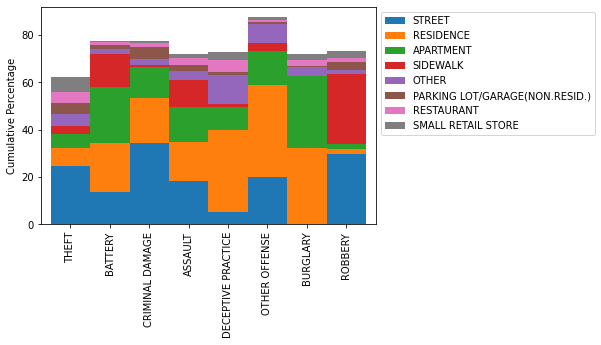

In [13]:
plt_prop = type_loc_prop.plot(kind='bar', stacked = True, width = 1)
plt_prop.legend(bbox_to_anchor=(1,1), loc='upper left', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

Está claro que las composiciones de color varían mucho entre los diferentes tipos de delitos. Podemos interpretar esta variación como el resultado de la interacción del tipo de ubicación del crimen. Es decir, los tipos de delitos influyen en cómo se distribuyen los delitos en diferentes tipos de ubicaciones. Si esta interacción realmente existe, centrarse en una ubicación específica solo afectará a un subconjunto de delitos, y si el objetivo es un tipo específico de delito (p. ej., robo), no basta con centrarse únicamente en las ubicaciones delictivas más frecuentes.

### Ejercicio 1

Volteemos el guión anterior; use el código anterior y en lugar de construir la tabla de proporciones de ubicaciones delictivas para cada tipo de delito, construya la tabla de tipos de delitos para cada ubicación delictiva. Nuevamente, solo incluya los 10 tipos y ubicaciones predominantes. Grafique los resultados con un gráfico de barras. ¿Sus resultados aún respaldan la interacción del tipo de ubicación del crimen?

In [15]:
loc_type_cross = pd.crosstab(df["Location Description"], df["Primary Type"])
loc_type_cross.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,10,5,12,54,0,19,30,29,2,1,...,0,18,0,0,5,9,1,0,29,12
AIRCRAFT,0,0,19,0,0,0,0,0,2,0,...,0,1,0,0,15,0,2,0,34,0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0,6,5,0,1,0,5,5,19,0,...,0,5,0,0,1,0,0,0,47,0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0,1,6,0,2,1,0,0,11,0,...,0,4,0,0,2,0,1,0,49,0
AIRPORT EXTERIOR - NON-SECURE AREA,0,9,13,0,1,0,2,2,27,0,...,0,6,0,0,1,0,0,0,19,1


In [17]:
loc_type_cross.sum(axis=1).head()

Location Description
ABANDONED BUILDING                                 330
AIRCRAFT                                            74
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA     99
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         80
AIRPORT EXTERIOR - NON-SECURE AREA                  91
dtype: int64

In [18]:
loc_type_cross = pd.crosstab(df["Location Description"], df["Primary Type"])
loc_type_prop = round(loc_type_cross.div(loc_type_cross.sum(axis=1), axis=0)*100,2).loc[col_idx,row_idx]
loc_type_prop

,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,DECEPTIVE PRACTICE,OTHER OFFENSE,BURGLARY,ROBBERY
STREET,26.35,11.22,16.67,5.89,1.61,5.75,0.08,5.92
RESIDENCE,11.00,22.09,12.04,6.95,13.57,14.60,9.09,0.51
APARTMENT,11.11,35.00,11.26,8.49,5.27,7.39,11.83,0.70
SIDEWALK,10.24,32.43,1.19,10.42,1.08,2.82,0.03,16.72
OTHER,29.25,9.01,7.10,6.65,19.96,11.96,4.36,2.03
PARKING LOT/GARAGE(NON.RESID.),35.54,10.29,17.49,6.05,2.44,1.92,0.49,4.64
RESTAURANT,44.99,10.04,6.28,7.85,13.42,2.68,4.53,2.83
SMALL RETAIL STORE,59.25,4.70,5.08,5.31,8.80,2.56,4.67,5.36


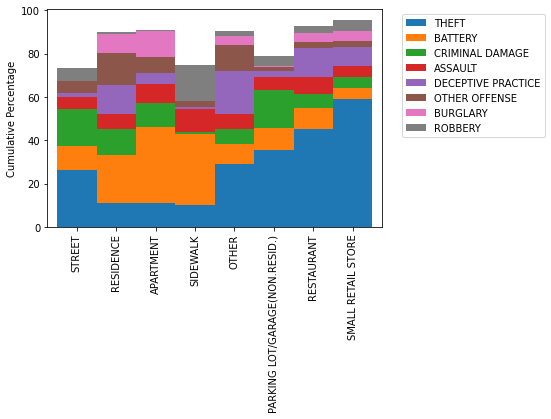

In [19]:
plt_prop_new = loc_type_prop.plot(kind='bar', stacked = True, width = 1)
plt_prop_new.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

Podemos encontrar nuevamente que las composiciones de color varían en diferentes lugares del crimen. Entonces, los resultados aún respaldan la interacción del tipo de ubicación del crimen.

## Prueba chi cuadrado para tablas de contingencia

Hemos generado la tabla de contingencia de `Primary Type` vs. `Location Description` y observamos que los desgloses específicos de las ubicaciones por tipo de delito no son uniformes. Concluimos que podría haber una interacción entre estas dos variables. Podemos probar formalmente si las variaciones que observamos realmente reflejan diferencias reales o si son solo un subproducto de la aleatoriedad. Hay muchas formas diferentes de realizar la prueba, pero nos centraremos en la prueba más utilizada: la **prueba de Chi-cuadrado**. La hipótesis nula para la prueba de Chi-cuadrado es:

$$
H_0:\text{Primary Type es independiente de Location Description}
$$

No necesitamos una definición formal de "independiente". Intuitivamente, "independencia entre dos variables" significa que la distribución de valores de una variable permanece igual incluso cuando cambia el valor de la segunda variable (y viceversa). En nuestro caso, esto significa que las proporciones de los diferentes tipos de delitos siguen siendo las mismas incluso si observamos diferentes lugares del delito. Los datos parecen indicar lo contrario, así que analicemos cómo resumir numéricamente los datos para examinar formalmente la hipótesis nula:

In [20]:
type_prop = (df["Primary Type"].value_counts()/df["Primary Type"].count()).sort_index()
type_prop

ARSON                                0.001662
ASSAULT                              0.072251
BATTERY                              0.184214
BURGLARY                             0.048657
CONCEALED CARRY LICENSE VIOLATION    0.000258
CRIM SEXUAL ASSAULT                  0.006105
CRIMINAL DAMAGE                      0.108703
CRIMINAL TRESPASS                    0.025507
DECEPTIVE PRACTICE                   0.067674
GAMBLING                             0.000715
HOMICIDE                             0.002526
HUMAN TRAFFICKING                    0.000030
INTERFERENCE WITH PUBLIC OFFICER     0.004068
INTIMIDATION                         0.000565
KIDNAPPING                           0.000711
LIQUOR LAW VIOLATION                 0.000715
MOTOR VEHICLE THEFT                  0.042612
NARCOTICS                            0.043638
NON-CRIMINAL                         0.000138
NON-CRIMINAL (SUBJECT SPECIFIED)     0.000007
OBSCENITY                            0.000322
OFFENSE INVOLVING CHILDREN        

Del mismo modo, las proporciones de todos los valores distintos de `Location Description` son:

In [21]:
location_prop = (df["Location Description"].value_counts()/df["Location Description"].count()).sort_index()
location_prop

ABANDONED BUILDING                                       0.001235
AIRCRAFT                                                 0.000277
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA          0.000371
AIRPORT BUILDING NON-TERMINAL - SECURE AREA              0.000299
AIRPORT EXTERIOR - NON-SECURE AREA                       0.000341
AIRPORT EXTERIOR - SECURE AREA                           0.000094
AIRPORT PARKING LOT                                      0.000322
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA           0.000793
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA               0.000213
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA             0.000041
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA           0.000296
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA               0.000861
AIRPORT TRANSPORTATION SYSTEM (ATS)                      0.000034
AIRPORT VENDING ESTABLISHMENT                            0.000442
AIRPORT/AIRCRAFT                                         0.000277
ALLEY     

Bajo la hipótesis nula, el número esperado de ocurrencias para todas las combinaciones por pares de valores de `Primary Type` y `Location Description` debe ser el producto de los valores correspondientes en las dos tablas anteriores, multiplicado por el número total de registros en el conjunto de datos. Por ejemplo, la cantidad total de incidentes de agresión con agresión en apartamentos (battery) debería ser aproximadamente $0.184214x0.125190xN$, con N= cantidad total de instancias delictivas en todo nuestro conjunto de datos.

In [22]:
primary_location_cross = pd.crosstab(df['Primary Type'], df['Location'])
g, p, dof, expctd = chi2_contingency(primary_location_cross)
print("p-value del test Chi-square para Primary Type vs. Location =", p)

p-value del test Chi-square para Primary Type vs. Location = 0.0


Podemos ver que el valor de $p$ es extremadamente pequeño y, por lo tanto, rechazamos la hipótesis nula y concluimos que `Primary Type` y `Location Description` no son independientes. En otras palabras, las proporciones de valores distintos de `Primary Type` no siguen siendo las mismas en diferentes valores de `Location Description`, que es exactamente lo que observamos en los datos.

## Prueba de chi-cuadrado para el tipo primario frente al día de la semana

A veces, cuando realizamos la prueba de Chi-cuadrado, una de las variables (o incluso ambas) no es naturalmente discreta (por ejemplo, el tiempo del crimen). Sin embargo, podemos discretizar la variable y realizar la prueba de Chi-cuadrado en las versiones discretizadas. Ahora discretizaremos la variable de tiempo en grupos de días de la semana y probaremos si el día de la semana es independiente de los tipos de delitos. Esta prueba nos informará si debemos variar el despliegue policial según el día de la semana. Empecemos:

In [23]:
# discretizar el tiempo
df["date_py"] = pd.to_datetime(df.Date)
df["day_of_week"] = df.date_py.dt.dayofweek
type_dow_cross = pd.crosstab(df['Primary Type'], df['day_of_week'])
type_dow_cross

day_of_week,0,1,2,3,4,5,6
Primary Type,,,,,,,
ARSON,70,61,73,64,58,54,64
ASSAULT,2820,2805,2868,2794,2777,2552,2688
BATTERY,6754,6540,6427,6423,6757,7702,8615
BURGLARY,1928,1895,2017,1873,2179,1610,1498
CONCEALED CARRY LICENSE VIOLATION,10,8,6,12,10,13,10
CRIM SEXUAL ASSAULT,211,189,211,177,204,288,351
CRIMINAL DAMAGE,4163,3985,3818,3881,4070,4497,4629
CRIMINAL TRESPASS,1010,963,967,1040,1002,941,892
DECEPTIVE PRACTICE,2816,2725,2707,2759,2934,2318,1822


El siguiente código da el resultado de realizar una prueba de Chi-cuadrado:

In [24]:
g, p, dof, expctd = chi2_contingency(type_dow_cross)
print("p-value del test Chi-square test para Primary Type vs. Day of week =", p)

p-value del test Chi-square test para Primary Type vs. Day of week = 1.7125583255212727e-292


Los resultados indican que `Primary Type` y `day_of_week` no son independientes. Visualicemos la distribución de los 10 delitos principales para cada día de la semana con un gráfico de barras apiladas:

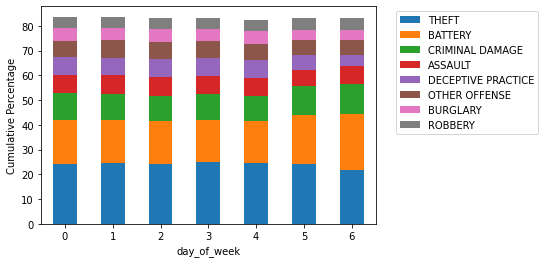

In [25]:
type_dow_plt_dat = round(type_dow_cross.div(type_dow_cross.sum(axis=0), axis=1).loc[row_idx,:]*100,2).T
plt_type_dow = type_dow_plt_dat.plot(kind='bar', stacked = True, rot = 0)
plt_type_dow.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

A partir de esto, podemos ver que el tipo de robo Battery tiende a ser más frecuente los viernes y sábados, mientras que el robo tiende a disminuir los sábados.

### Ejercicio 2

Sospechamos que en el transcurso de un día típico, la distribución de las ubicaciones de los delitos puede cambiar sustancialmente. Realice una prueba para determinar si este es el caso. Si este es el caso, identifique el cambio potencial construyendo un gráfico de barras apiladas que muestre la proporción de delitos en cada una de las 10 ubicaciones principales para cada hora del día.

In [26]:
df["hour_of_day"] = df.date_py.dt.hour
hod_loc_cross = pd.crosstab(df['hour_of_day'], df['Location Description'])
g, p, dof, expctd = chi2_contingency(hod_loc_cross)
print("Test de independencia para ubicaciones de crimen y hora del dia: p-value =", p)

Test de independencia para ubicaciones de crimen y hora del dia: p-value = 0.0


Encontramos que la ubicación y la hora del día son de hecho dependientes. Visualicemos esto:

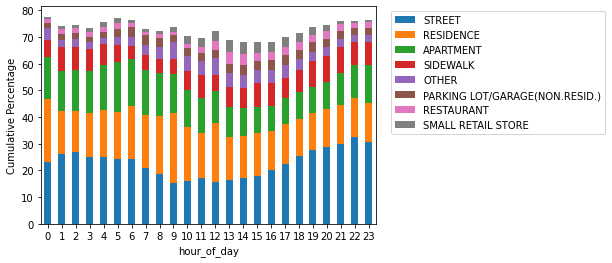

In [27]:
hod_loc_plt_dat = round(hod_loc_cross.div(hod_loc_cross.sum(axis=1), axis=0).loc[:,col_idx]*100,2)
plt_hod_loc = hod_loc_plt_dat.plot(kind='bar', stacked = True, rot = 0)
plt_hod_loc.legend(bbox_to_anchor=(1.7,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

Podemos ver que en la mañana (5AM - 12PM), los delitos en residencia (naranja) tienden a aumentar y después de las 6PM, los delitos comienzan a afluir hacia las calles.

## Conclusiones

En este caso, realizamos la prueba de Chi-cuadrado para validar varios patrones y relaciones que observamos entre varias características en nuestros incidentes delictivos anteriores de la EDA de Chicago. Esta prueba proporcionó evidencia estadística de que el patrón que vimos anteriormente en las tablas de contingencia no se debía solo al azar. Esto proporciona un fuerte respaldo para que el departamento de policía dé el gran paso de reorganizar su fuerza de acuerdo con nuestras observaciones.

## Para llevar
En este caso, aprendimos el concepto de independencia de características y aprendimos cómo realizar pruebas de Chi-cuadrado para examinar si dos factores discretos son independientes. La prueba de Chi-cuadrado ayuda a validar estadísticamente los patrones que observamos a partir del análisis de datos exploratorios.